In [1]:
import numpy as np
import seaborn as sns
import random as rnd
import scipy as sp
import math
from matplotlib import pyplot as plt

In [37]:
E = 1
D = 2
N = 500
eps = 10**(-1)

In [38]:
F_x = np.linspace(E-3*math.sqrt(D),E+3*math.sqrt(D), 10000)
F_y = [0.5 * (1 + math.erf((x - E)/math.sqrt(2*D))) for x in F_x]
P = []
for sample_len in range(1,N+1):
    error = []
    for gen in range(1,50):
        sample = np.random.normal(E,math.sqrt(D),sample_len)
        ECDF_obj = sp.stats.ecdf(sample)
        ECDF = ECDF_obj.cdf.evaluate(F_x)
        error.append(np.max(np.abs(F_y - ECDF)))
    error = np.array(error)
    P.append(len(error[error>=eps])/gen)

<Axes: >

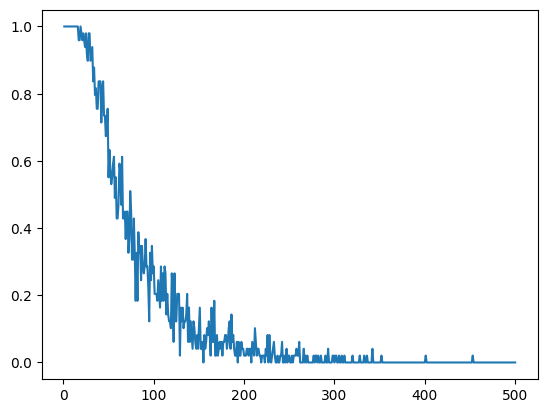

In [39]:
sns.lineplot(x = range(1,N+1), y = P)